# Sprint9 深層学習スクラッチ ニューラルネットワーク

### Sprintの目的
スクラッチを通してニューラルネットワークの基礎を理解する

画像データの扱い方を知る

### どのように学ぶか
スクラッチで単純なニューラルネットワークを実装した後、学習と検証を行なっていきます。


In [5]:
### MNISTデータをDLする。
### コンソールで pip install keras と tensorflow を実施する必要があった。
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

/Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np

In [3]:
### ↑は警告のようなので、一旦保留
### MNISTとは？＞画像分類のための定番データセットで、手書き数字認識を行います。
### 画像データとは？＞デジタル画像は点の集合で、これをピクセルと呼ぶ。

In [6]:
### データの中身を見てみる
print(X_train.shape)
print(X_test.shape)
print(X_train[0].dtype)
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [17]:
### 平滑化(flatten)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
# print(X_train)
# print(X_train.shape)
# reshape の-1は元の形状から推測されて決定される。何故か60000？？w

<function matplotlib.pyplot.show>

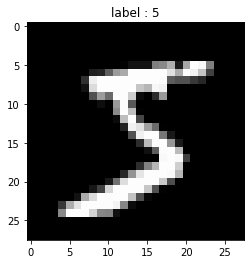

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28, 28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show

In [24]:
### 前処理 サンプルコード１
### 機械学習をする上で画像を0から1のfloat型で扱う必要がある。
import numpy as np
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [25]:
### 前処理 サンプルコード2
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [28]:
### 前処理 サンプルコード3
from sklearn.model_selection import train_test_split # データ分割

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(38400, 784)
(9600, 784)


In [29]:
### 雛形
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self, verbose = False, r = 0.1, epochs=3, sigma=0.01):
        # 問題１：重みの初期値を決めるコードの作成
        # selfを宣言している関数で使用できるようにする。
        self.verbose = verbose
        self.epochs = epochs
        self.sigma = sigma
        
        self.W1 = self.init_W(784, 400)
        self.W2 = self.init_W(400, 200)
        self.W3 = self.init_W(200, 10)
        
        # 重みの初期値を求める
        self.B1 = self.sigma * np.random.randn(400)
        self.B2 = self.sigma * np.random.randn(200)
        self.B3 = self.sigma * np.random.randn(10)
        
        self.cross_entropy_list = []
        self.cross_entropy_list_val = []
        
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """

        pass
        return

In [30]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練用データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [31]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

1920
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([8, 4, 0, 8, 2, 1, 7, 7, 8, 3, 1, 2, 0, 7, 8, 6, 4, 9, 5, 1],
      dtype=uint8))


### 【問題1】重みの初期値を決めるコードの作成
ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。

In [33]:
### サンプルコード
n_features = 784
n_nodes1 = 400
sigma = 0.01
W1 = sigma * np.random.randn(n_features, n_nodes1)
print(W1)

[[ 0.01601001  0.00877936  0.00620654 ... -0.00868356 -0.01346301
   0.00854646]
 [-0.00282161  0.01278168  0.00767849 ... -0.01218004 -0.00359008
  -0.01198876]
 [-0.01783424  0.01469521  0.00765054 ... -0.0158252   0.01680554
   0.0089378 ]
 ...
 [-0.00741577  0.00330846 -0.01456593 ...  0.00421272 -0.00334218
  -0.00293279]
 [-0.00837184  0.00021587  0.00389286 ...  0.00838604 -0.01321279
   0.00662671]
 [-0.01518731 -0.01823948 -0.00393914 ... -0.00492671  0.00183399
  -0.00696243]]


In [35]:
### サンプルコード
n_features = 784
n_nodes1 = 400
sigma = 0.01
W1 = sigma * np.random.randn(n_features, n_nodes1)
print(W1)

[[-3.44745153e-03 -8.84696996e-03  5.32563736e-03 ... -2.00778901e-02
  -2.44038431e-03 -5.87551177e-03]
 [-8.75068803e-03  9.35141644e-03  5.77133282e-03 ... -6.09777239e-03
   1.32666900e-02  1.17135822e-02]
 [-1.60608028e-02  1.13834614e-02  1.22335957e-02 ... -1.27313099e-02
   8.76380487e-03  1.98829435e-03]
 ...
 [ 5.68732233e-03 -1.71055184e-03 -3.59241173e-03 ... -1.38666707e-03
   5.70743938e-03 -2.00362601e-02]
 [ 1.26079012e-02 -3.98367036e-03  5.05342897e-03 ...  1.13808254e-02
   1.35211409e-03  1.35910363e-03]
 [-1.72072587e-05  1.87536471e-02  1.19151997e-02 ... -7.45319015e-03
   1.50070918e-03  2.43939738e-03]]


In [43]:
n_features = 784
# n_nodes1 = 
n_nodes1 = 400
sigma = 0.01
W1 = sigma * np.random.randn(n_features, n_nodes1)
print(W1)

[[ 6.03244229e-03  1.70757715e-02  7.43963905e-03 ...  1.87585112e-02
  -7.63417978e-03 -4.00071756e-03]
 [ 9.91085531e-03  6.21742050e-03  7.03646550e-04 ...  2.81193837e-03
   4.28438688e-03  6.54497204e-03]
 [-1.27638382e-02 -2.50844840e-03  4.83084391e-03 ... -4.33564994e-03
  -1.13249195e-02  1.69973646e-02]
 ...
 [-7.76874339e-03 -3.26899115e-03 -6.38733177e-03 ...  4.88816367e-03
   4.92486115e-03 -1.28105988e-02]
 [-4.22582207e-03  8.88389516e-03  1.12150188e-02 ... -2.65867542e-03
   5.43067632e-04  3.18550785e-03]
 [-9.36421345e-03  1.40029649e-03 -5.31947205e-05 ... -1.01386680e-02
  -2.15582473e-03  7.09466975e-04]]


### 【問題2】フォワードプロパゲーションの実装
三層のニューラルネットワークの フォワードプロパゲーション を作成してください。
以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。

In [44]:
batch_size = 20 # バッチサイズ
n_features = 784 # 特徴量の数
n_nodes1 = 400 # 1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_output = 10 # 出力のクラス数（3層目のノード数）